# Forecasting

## Config environemnt

In [1]:
# Import library to use operating system functions
import os

In [2]:
# Set workspace
for dirname, _, filenames in os.walk('/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.DS_Store
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/LICENSE
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/CreditCardPurchaseHistoryForecasting.ipynb
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/UCI_Credit_Card.csv
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/CreditCardPurchases.csv
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/README.md
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/PJME_hourly.csv
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.gitignore
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/CreditCardBalanceForecasting.ipynb
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/.DS_Store
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/config
/Users/macbookpro/Develope

## Load data

In [18]:
# Import library to manage files
import pandas as pd

In [4]:
# Load dataset
pjme_hourly_data = pd.read_csv('PJME_hourly.csv', index_col=[0], parse_dates=[0])

pjme_hourly_data.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [18]:
# Remove non-numeric characters and convert to float
# pjme_hourly_data['PJME_MW'] = pjme_hourly_data['PJME_MW'].str.replace('Q. ', '', regex=True)
# pjme_hourly_data['MONTHLY'] = pjme_hourly_data['MONTHLY'].str.replace('Q. ', '', regex=True)

# pjme_hourly_data['PJME_MW'] = pjme_hourly_data['PJME_MW'].str.replace(',', '', regex=True).astype(float)
# pjme_hourly_data['MONTHLY'] = pjme_hourly_data['MONTHLY'].str.replace(',', '', regex=True).astype(float)

# pjme_hourly_data.head()

## EDA

In [5]:
# Stats summary
print(pjme_hourly_data.describe())

             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


In [6]:
# Verify null data
pjme_hourly_data.isnull().sum()

PJME_MW    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

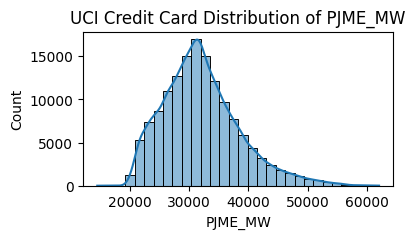

In [8]:
# Histograms for numeric variables
pjme_hourly_data_columns = pjme_hourly_data.select_dtypes(include = ['float64', 'int64']).columns

for col in pjme_hourly_data_columns:
    plt.figure(figsize = (4, 2))
    sns.histplot(pjme_hourly_data[col], kde = True, bins = 30)
    plt.title(f"UCI Credit Card Distribution of {col}")
    plt.show()


In [9]:
pjme_hourly_data = pjme_hourly_data['PJME_MW']

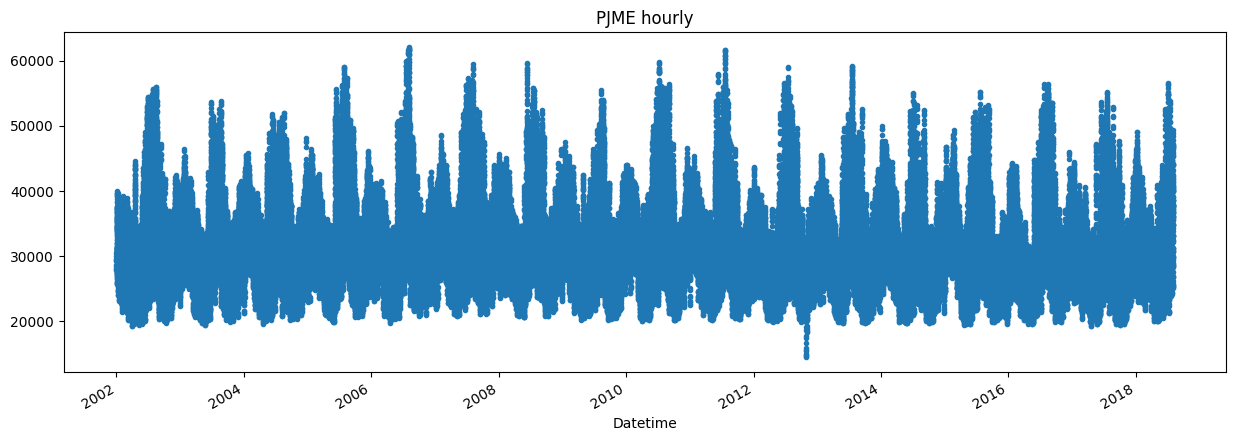

In [10]:
_ = pjme_hourly_data.plot(style = '.', figsize = (15,5), title = 'PJME hourly')

## Split data

In [11]:
split_date = '01-Jan-2015'

pjme_hourly_data_train = pjme_hourly_data.loc[pjme_hourly_data.index <= split_date].copy()
pjme_hourly_data_test = pjme_hourly_data.loc[pjme_hourly_data.index > split_date].copy()

print(pjme_hourly_data_train)
print(pjme_hourly_data_test)

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
                        ...   
2014-01-01 20:00:00    36193.0
2014-01-01 21:00:00    35601.0
2014-01-01 22:00:00    34242.0
2014-01-01 23:00:00    32215.0
2014-01-02 00:00:00    30159.0
Name: PJME_MW, Length: 113927, dtype: float64
Datetime
2015-12-31 01:00:00    24305.0
2015-12-31 02:00:00    23156.0
2015-12-31 03:00:00    22514.0
2015-12-31 04:00:00    22330.0
2015-12-31 05:00:00    22773.0
                        ...   
2018-01-01 20:00:00    44284.0
2018-01-01 21:00:00    43751.0
2018-01-01 22:00:00    42402.0
2018-01-01 23:00:00    40164.0
2018-01-02 00:00:00    38608.0
Name: PJME_MW, Length: 31439, dtype: float64


In [19]:
_ = pjme_hourly_data_test \
    .rename(columns = {'PJME_MW': 'TEST SET'}) \
    .join(pjme_hourly_data_train.rename(columns = { 'PJME_MW': 'TRAINING SET' }), how = 'outer') \
    .plot(figsize = (15, 5), title = 'PJM East', style = '.')

TypeError: rename() got an unexpected keyword argument 'columns'

## Prepare data for Forcasting

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
    X = df[['hour','dayofweek','quarter','month','year', 'dayofyear','dayofmonth','weekofyear']]

    if label:
        y = df[label]

        return X, y
    
    return X

In [ ]:
pjme_hourly_X_train, pjme_hourly_y_train = create_features(pjme_hourly_data_train, label='PJME_MW')
pjme_hourly_X_test, pjme_hourly_y_test = create_features(pjme_hourly_data_test, label='PJME_MW')

In [ ]:
pjme_hourly_X_train.head()

In [ ]:
pjme_hourly_X_test.head()

In [ ]:
pjme_hourly_y_train.head()

In [ ]:
pjme_hourly_y_test.head()

## XGBoost model

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
pjme_hourly_xgboost_model = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)

pjme_hourly_xgboost_model.fit(
    pjme_hourly_X_train, pjme_hourly_y_train,
    eval_set = [(pjme_hourly_X_train, pjme_hourly_y_train), (pjme_hourly_X_test, pjme_hourly_y_test)],
    verbose = True
)

pjme_hourly_xgboost_model

In [ ]:
# Predict with test data
pjme_hourly_xgboost_forecast = pjme_hourly_xgboost_model.predict(pjme_hourly_X_test)

# Calculate metrics
pjme_hourly_xgboost_mae = mean_absolute_error(pjme_hourly_y_test, pjme_hourly_xgboost_forecast)
pjme_hourly_xgboost_mse = mean_squared_error(pjme_hourly_y_test, pjme_hourly_xgboost_forecast)
pjme_hourly_xgboost_mape = mean_absolute_percentage_error(pjme_hourly_y_test, pjme_hourly_xgboost_forecast)

print(f"MAE: { pjme_hourly_xgboost_mae }")
print(f"MSE: { pjme_hourly_xgboost_mse }")
print(f"MAPE: { pjme_hourly_xgboost_mape }")

In [ ]:
pjme_hourly_xgboost_forecast

In [ ]:
pjme_hourly_data_test

In [ ]:
pjme_hourly_data_test['MW_XGBOOST_Prediction'] = pjme_hourly_xgboost_forecast

pjme_hourly_data_test

In [ ]:
pjme_hourly_xgboost_all = pd.concat([pjme_hourly_data_test, pjme_hourly_data_train], sort=False)

_ = pjme_hourly_xgboost_all[['PJME_MW','MW_XGBOOST_Prediction']].plot(figsize=(15, 5))

In [ ]:
import pandas as pd

In [ ]:
pjme_hourly_last_date = pjme_hourly_data_test.index.max()

pjme_hourly_last_date

In [ ]:
# Create a future dataframe with hourly datetime index from 2018-08-03 to 2025
pjme_hourly_future_dates = pd.date_range(
    start = pjme_hourly_last_date,
    end = '2025-12-31 23:00:00',
    freq = 'H'
)

pjme_hourly_future_data = pd.DataFrame(index = pjme_hourly_future_dates)

pjme_hourly_future_data.head()

In [ ]:
# Generate features for the future dataframe
pjme_hourly_future_features = create_features(pjme_hourly_future_data)

# Predict the PJME_MW values for the future dataframe
pjme_hourly_future_forcasting = pjme_hourly_xgboost_model.predict(pjme_hourly_future_features)

# Add the predictions to the future dataframe
pjme_hourly_future_data['PJME_MW_XGBOOST_Prediction'] = pjme_hourly_future_forcasting

# Display the future dataframe with predictions
pjme_hourly_future_data.head()

In [ ]:
# Add future predictions to the combined dataframe
pjme_hourly_all = pd.concat([pjme_hourly_data_test, pjme_hourly_data_train, pjme_hourly_future_data], sort=False)

# Plot the actual and predicted values including future predictions
_ = pjme_hourly_all[['PJME_MW', 'MW_XGBOOST_Prediction', 'PJME_MW_XGBOOST_Prediction']]\
    .plot(figsize = (15, 5), title = 'PJME MW Predictions')

In [ ]:
pjme_hourly_data_train

In [ ]:
pjme_hourly_future_data

In [ ]:
_ = plot_importance(pjme_hourly_xgboost_model, height=0.9)

## ARIMA model

In [ ]:
import numpy as np
import statsmodels.api as sm

In [ ]:
# Train ARIMA model (p, d, q)
pjme_hourly_arima_model = sm.tsa.ARIMA(pjme_hourly_y_train, order = (1, 1, 1))

# Explainme the order
# p: number of lag observations included in the model
# d: number of times that the raw observations are differenced
# q: size of the moving average window

# What other parameters can be used?
# trend: 'n', 'c', 't', 'ct'
# enforce_stationarity: True, False
# enforce_invertibility: True, False

# Train ARIMA model with other parameters
#uci_cc_arima_model = sm.tsa.ARIMA(uci_cc_y_train, order = (1,1,1), trend = 'c', enforce_stationarity = False, enforce_invertibility = False)

pjme_hourly_arima_model_fit = pjme_hourly_arima_model.fit()

# Predict on test set
pjme_hourly_arima_forecast = pjme_hourly_arima_model_fit.forecast(steps = len(pjme_hourly_y_test))

# Evaluate performance
pjme_hourly_arima_mae = mean_absolute_error(pjme_hourly_y_test, pjme_hourly_arima_forecast)
pjme_hourly_arima_mse = mean_squared_error(pjme_hourly_y_test, pjme_hourly_arima_forecast)
pjme_hourly_arima_mape = mean_absolute_percentage_error(pjme_hourly_y_test, pjme_hourly_arima_forecast)

print(f"ARIMA Model Metrics:")
print(f"MAE: {pjme_hourly_arima_mae}")
print(f"MSE: {pjme_hourly_arima_mse}")
print(f"MAPE: {pjme_hourly_arima_mape}")

In [ ]:
pjme_hourly_arima_forecast

In [ ]:
pjme_hourly_arima_forecast_array = pjme_hourly_arima_forecast.to_numpy()

pjme_hourly_arima_forecast_array

In [ ]:
pjme_hourly_data_test['MW_Arima_Prediction'] = pjme_hourly_arima_forecast_array

pjme_hourly_data_test

In [ ]:
pjme_hourly_future_data = pd.DataFrame(index = pjme_hourly_future_dates)

pjme_hourly_future_data

In [ ]:
pjme_hourly_arima_future_forecast = pjme_hourly_arima_model_fit.forecast(steps = len(pjme_hourly_future_data))

pjme_hourly_arima_future_forecast

In [ ]:
pjme_hourly_arima_future_forecast_array = pjme_hourly_arima_future_forecast.to_numpy()

pjme_hourly_arima_future_forecast_array

In [ ]:
# Add the predictions to the future dataframe
pjme_hourly_future_data['PJME_MW_ARIMA_Prediction'] = pjme_hourly_future_forcasting

# Display the future dataframe with predictions
pjme_hourly_future_data.head()

In [ ]:
pjme_hourly_future_data["PJME_MW_ARIMA_Prediction"]

In [ ]:
pjme_hourly_arima_all = pd.concat([pjme_hourly_data_test, pjme_hourly_data_train], sort=False)

In [ ]:
pjme_hourly_arima_all.tail(100)

In [ ]:
# Add future predictions to the combined dataframe
pjme_hourly_arima_all = pd.concat([pjme_hourly_data_test, pjme_hourly_data_train, pjme_hourly_future_data], sort=False)

# Plot the actual and predicted values including future predictions
_ = pjme_hourly_arima_all[['PJME_MW', 'MW_Arima_Prediction', 'PJME_MW_ARIMA_Prediction']]\
    .plot(figsize = (15, 5), title = 'PJME MW Predictions')

## SARIMA model

In [ ]:
uci_cc_sarima_model = sm.tsa.SARIMAX(uci_cc_y_train, order=(1,1,1))
uci_cc_sarima_model_fit = uci_cc_sarima_model.fit()

# Predict with SARIMA
uci_cc_sarima_forecast = uci_cc_sarima_model_fit.forecast(steps=len(uci_cc_y_test))

# Evaluate performance
uci_cc_mae = mean_absolute_error(uci_cc_y_test, uci_cc_sarima_forecast)
uci_cc_mse = mean_squared_error(uci_cc_y_test, uci_cc_sarima_forecast)
uci_cc_mape = mean_absolute_percentage_error(uci_cc_y_test, uci_cc_sarima_forecast)

print(f"ARIMA Model Metrics:")
print(f"MAE: {uci_cc_mae}")
print(f"MSE: {uci_cc_mse}")
print(f"MAPE: {uci_cc_mape}")

In [ ]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label = "TEST SET",
    color = 'orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_sarima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc='lower right',)
plt.show()

In [ ]:
# Predict the BILL_AMT for month 7 to month 12
uci_cc_sarima_future_forecast = uci_cc_sarima_model_fit.forecast(steps = len(uci_cc_data_future))

uci_cc_sarima_future_forecast

In [ ]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label="TEST SET",
    color='orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_sarima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

plt.scatter(
    uci_cc_data_future["Month_Num"],
    uci_cc_sarima_future_forecast,
    label = "PREDICTIONS",
    color = 'green',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()